In [ ]:
# 피처 형태의 종류
# 1. 수치형 피처
#  1) 연속형 피처 : 어떤 구간 안에 모든 값을 데이터로 가질 수 있음- 키, 몸무게
#  2) 비연속형 피처 : 셀수 있으며, 일정 구간 안에서 정해진 몇 개의 값을 가짐 - 나이
# 2. 범주형 피처
#  1) 순서 있는 범주형 피처 : 순서가 있으나 수치는 아니다 - 학점 (A,B,C...)
#  2) 순서 없는 범주형 피처 : 데이터가 구분되면서도 순서가 없다 - 혈액형

In [1]:
import pandas as pd

file_path = './data/chipotle.tsv'

chipo = pd.read_csv(file_path, sep = '\t')

print(chipo.shape)
print('------------------------')
print(chipo.info())

(4622, 5)
------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [2]:
# 아이템별 주문 총량을 계산

item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10] # 아이템별 주문 총량을 출력

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

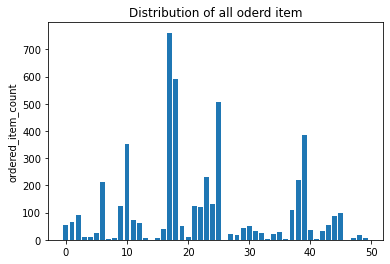

In [4]:
# 시각화
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all oderd item')

plt.show()

In [7]:
# 데이터 전처리 : 전처리 함수 사용하기
# item_price 피처 살펴보기
print(chipo.info())
print('------------------------------------------------------------')
chipo['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None
------------------------------------------------------------


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [8]:
# apply() , lambda를 이용한 데이터 전처리
# column 단위 데이터 apply() 함수로 전처리를 적용
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo.describe()

,order_id,quantity,item_price
count,4622.000000,4622.000000,4622.000000
mean,927.254868,1.075725,7.464336
std,528.890796,0.410186,4.245557
min,1.000000,1.000000,1.090000
25%,477.250000,1.000000,3.390000
50%,926.000000,1.000000,8.750000
75%,1393.000000,1.000000,9.250000
max,1834.000000,15.000000,44.250000


In [9]:
# 주문당 평균 계산금액 출력
chipo.groupby('order_id')['item_price'].sum().mean()

18.81142857142869

In [11]:
# 한 주문에 10달러 이상 지불한 주문 번호(id) 출력
chipo_orderid_group = chipo.groupby('order_id').sum()
results = chipo_orderid_group[chipo_orderid_group.item_price >= 10]
print(results[:10])
print(results.index.values)

          quantity  item_price
order_id                      
1                4       11.56
2                2       16.98
3                2       12.67
4                2       21.00
5                2       13.70
6                2       17.50
7                2       15.70
8                2       10.88
9                3       10.67
10               2       13.20
[   1    2    3 ... 1832 1833 1834]


In [13]:
# 각 아이템의 가격 구하기
chipo_one_item = chipo[chipo.quantity == 1]
price_per_item = chipo_one_item.groupby('item_name').min()
price_per_item.sort_values(by = "item_price", ascending = False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,250,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,501,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,468,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,103,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,230,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,4,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,17,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,26,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


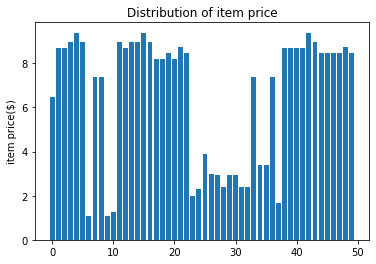

In [15]:
# 아이템 가격 분포 그래프를 출력
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()

plt.bar(x_pos, item_price, align='center')
plt.ylabel('item price($)')
plt.title("Distribution of item price")
plt.show()

In [16]:
# 가장 비싼 주문에서 아이템이 총 몇 개 팔렸는지 계산
chipo.groupby('order_id').sum().sort_values(by='item_price', ascending=False)[:5]

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


In [19]:
# Veggie Salad Bowl이 몇번 주문되었는지 확인
chipo_salad = chipo[chipo['item_name'] == "Veggie Salad Bowl"]

# 한 주문 내에서 중복 집계된 item_name을 제거
chipo_salad = chipo_salad.drop_duplicates(['item_name', 'order_id'])

print(len(chipo_salad))
chipo_salad.head(5)

18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [22]:
# Chicken Bowl을 2개 이상 주문한 주문 횟수
chipo_chicken = chipo[chipo['item_name'] == "Chicken Bowl"]
chipo_chicken_result = chipo_chicken[chipo_chicken['quantity'] >=2]
print(chipo_chicken_result.shape[0])

33


#### 국가별 음주 데이터  분석

 - country : 국가 정보
 - beer_servings : beer  소비량
 - spirit_servings : spirit 소비량
 - wine_servings : wine 소비량
 - total_litres_of_pure_alcohol : 총 알코올 소비량
 - continent : 국가의 대륙 정보

In [28]:
# drinks  데이터셋의 기초 정보 출력

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = './data/drinks.csv'
drinks = pd.read_csv(file_path)
print(drinks.info())
drinks.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [29]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [30]:
# 두 피처 간의 상관 계수 구하기
# beer_servings 두 피처 간의 상관 계수를 계산
# pearson은 상관 계수를 구하는 계산 방법 중 하나로 가장 널리 쓰이는 방법
corr = drinks[['beer_servings', 'wine_servings']].corr(method='pearson')
print(corr)

               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


In [33]:
# 피처 간의 상관 계수 행렬
cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method='pearson')
print(corr)

                              beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


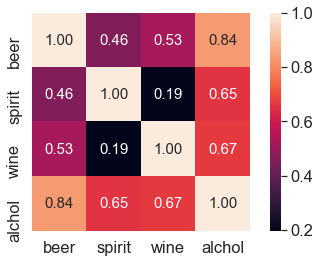

In [36]:
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

#corr 행렬 히트맵을 시각화
cols_view = ['beer', 'spirit', 'wine', 'alchol']
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
                 cbar = True,
                 annot = True,
                 square = True,
                 fmt = '.2f',
                 annot_kws = {'size' : 15},
                 yticklabels = cols_view,
                 xticklabels = cols_view)
plt.tight_layout()
plt.show()

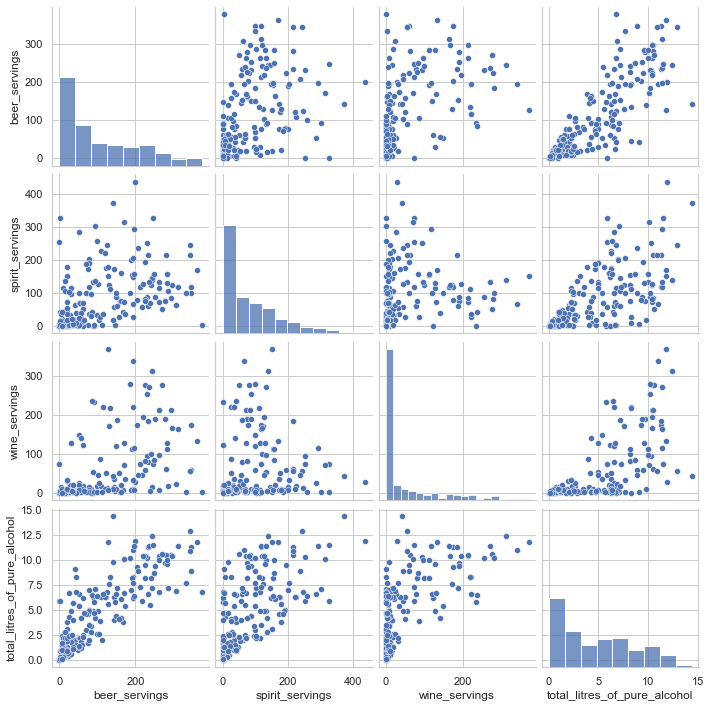

In [41]:
# 시각화 - 산점도
sns.set(style = 'whitegrid', context='notebook')
sns.pairplot(drinks[['beer_servings', 'spirit_servings',
             'wine_servings', 'total_litres_of_pure_alcohol']], height = 2.5)
plt.show()                    

In [43]:
# 결측 데이터 처리 -> 기타(Other) 대륙으로 통합 -> 'OT'
drinks['continent'] = drinks['continent'].fillna('OT')
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


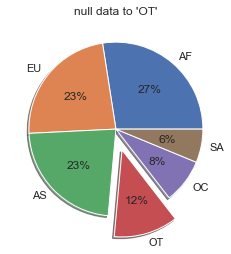

In [44]:
# OT 차지하는 비율을 확인 -> 가장좋은 시각화는? Pie
labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
explode = (0, 0, 0, 0.25, 0, 0)

plt.pie(fracs1, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)
plt.title('null data to \'OT\'')
plt.show()

In [45]:
# agg() 함수를  사용한 대류별 분석
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 계산
result = drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'sum'])
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


In [46]:
#  전체 평균보다 많은 알코올을 섭취하는 대륙
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean = continent_mean[continent_mean >= total_mean]
print(continent_over_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [48]:
#  전체 평균보다 가장 높은 대륙
beer_continent = drinks.groupby('continent').beer_servings.mean().idxmax()
print(beer_continent)

EU


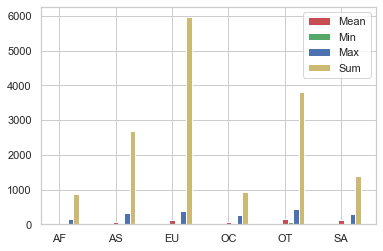

In [51]:
# 분석결과 시각화 
# 대륙별 sprit_servings의 평균, 최소, 최대, 합계
n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

index = np.arange(n_groups)
bar_width = 0.1

rects1 = plt.bar(index, means, bar_width, color='r', label='Mean')
rects2 = plt.bar(index+bar_width, mins, bar_width, color='g', label='Min')
rects3 = plt.bar(index+bar_width * 2, maxs, bar_width, color='b', label='Max')
rects4 = plt.bar(index+bar_width * 3, sums, bar_width, color='y', label='Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

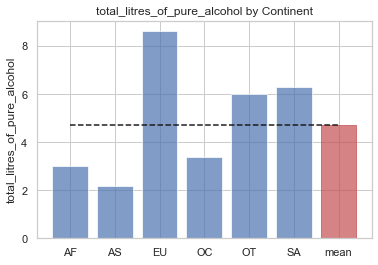

In [54]:
# 대류별 total_litress_of_pure_alcohol을 시각화
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)

bar_list = plt.bar(x_pos, alcohol, align='center', alpha = 0.7)
bar_list[len(continents) - 1].set_color('r')
plt.plot([0.,6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

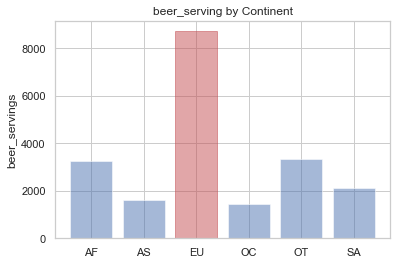

In [58]:
# 대륙별 beer_servings를 시각화
beer_group = drinks.groupby('continent')['beer_servings'].sum()
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))
alcohol = beer_group.tolist()

bar_list = plt.bar(y_pos, alcohol, align='center', alpha=0.5)
bar_list[continents.index("EU")].set_color('r')
plt.xticks(y_pos, continents)
plt.ylabel('beer_servings')
plt.title('beer_serving by Continent')

plt.show()

In [60]:
# 아프리카와 유럽 간의 맥주 소비량 차이 검정
africa = drinks.loc[drinks['continent'] == 'AF']
europe = drinks.loc[drinks['continent'] == 'EU']

from scipy import stats
tTestResult = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])
tTestResultDiffVar = stats.ttest_ind(africa['beer_servings'],
                                     europe['beer_servings'], equal_var = False)

print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)
print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResultDiffVar)


The t-statistic and p-value assuming equal variances is -7.268 and 0.000.
The t-statistic and p-value assuming equal variances is -7.144 and 0.000.


In [68]:
# 대한민국은 얼마나 술을 독하게 마시는 나라인가?
# total_servings 피처를 생성
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']

# 술 소비량 대비 알코올 비율 피처를 생성
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)

# 순위 정보를 생성
country_with_rank = drinks[['country', 'alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by=['alcohol_rate'], ascending=0)
country_with_rank.head(5)

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


In [ ]:
# 국가별 쉰위 정보 시각화
